In [23]:
import collections
import csv
import io
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import re

from types import SimpleNamespace

from doc_metrics import csv_to_rows_of_strings, RowColumnView, Metrics

In [24]:
day_a = r'readthedocs_traffic_analytics_jupyterlab_2023-12-05_2024-03-04.csv'
day_a_plus_one = r'readthedocs_traffic_analytics_jupyterlab_2023-12-06_2024-03-05.csv'

metrics_a = Metrics(csv_to_rows_of_strings(path=day_a))
metrics_b = Metrics(csv_to_rows_of_strings(path=day_a_plus_one))
metrics_c = Metrics.build(path=[day_a, day_a_plus_one])
allmet = [metrics_a, metrics_b, metrics_c]

In [25]:
[m.total_views() for m in allmet]

[525801, 526352, 533774]

In [26]:
[m.most_popular_pages(3) for m in allmet]

[[('/index.html', 91722),
  ('/getting_started/installation.html', 91100),
  ('/getting_started/starting.html', 48675)],
 [('/index.html', 91667),
  ('/getting_started/installation.html', 91260),
  ('/getting_started/starting.html', 48740)],
 [('/index.html', 92985),
  ('/getting_started/installation.html', 92459),
  ('/getting_started/starting.html', 49412)]]

In [27]:
[m.most_popular_versions(3) for m in allmet]

[[('stable', 330250), ('latest', 147295), ('3.6.x', 21594)],
 [('stable', 330042), ('latest', 148136), ('3.6.x', 21601)],
 [('stable', 334638), ('latest', 150218), ('3.6.x', 21922)]]

In [28]:
sday_a = r'readthedocs_search_analytics_jupyterlab_2023-12-05_2024-03-04.csv'
sday_a_plus_one = r'readthedocs_search_analytics_jupyterlab_2023-12-06_2024-03-05.csv'

smetrics_a = Metrics(csv_to_rows_of_strings(path=sday_a))
smetrics_b = Metrics(csv_to_rows_of_strings(path=sday_a_plus_one))
smetrics_c = Metrics.build(path=[sday_a, sday_a_plus_one])
sallmet = [smetrics_a, smetrics_b, smetrics_c]

In [31]:
smetrics_c.most_popular_queries(10)

[('password', 121),
 ('download', 78),
 ('kernel', 66),
 ('config', 66),
 ('token', 59),
 ('shortcut', 52),
 ('markdown', 43),
 ('docker', 43),
 ('update', 42),
 ('shortcuts', 40)]

In [30]:
[m.most_popular_queries(8) for m in sallmet]

[[('password', 120),
  ('download', 77),
  ('kernel', 63),
  ('config', 63),
  ('token', 59),
  ('shortcut', 51),
  ('docker', 43),
  ('markdown', 42)],
 [('password', 117),
  ('download', 77),
  ('kernel', 66),
  ('config', 64),
  ('token', 57),
  ('shortcut', 52),
  ('markdown', 43),
  ('update', 42)],
 [('password', 121),
  ('download', 78),
  ('kernel', 66),
  ('config', 66),
  ('token', 59),
  ('shortcut', 52),
  ('markdown', 43),
  ('docker', 43)]]

<BarContainer object of 25 artists>

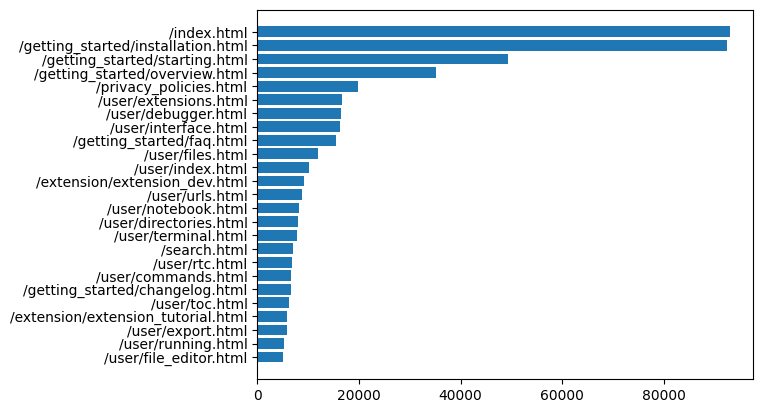

In [32]:
most_pop = metrics_c.most_popular_pages(25)
fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.invert_yaxis()
ax.barh([i[0] for i in most_pop], [i[1] for i in most_pop])  # Plot some data on the axes.